In [38]:
# import dataset
import pandas as pd

df = pd.read_csv('/content/diet_recommendations_dataset.csv')
df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [39]:
# menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        1000 non-null   object 
 1   Age                               1000 non-null   int64  
 2   Gender                            1000 non-null   object 
 3   Weight_kg                         1000 non-null   float64
 4   Height_cm                         1000 non-null   int64  
 5   BMI                               1000 non-null   float64
 6   Disease_Type                      796 non-null    object 
 7   Severity                          1000 non-null   object 
 8   Physical_Activity_Level           1000 non-null   object 
 9   Daily_Caloric_Intake              1000 non-null   int64  
 10  Cholesterol_mg/dL                 1000 non-null   float64
 11  Blood_Pressure_mmHg               1000 non-null   int64  
 12  Glucose

In [40]:
# cek apakah ada baris yang kosong
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Weight_kg,0
Height_cm,0
BMI,0
Disease_Type,204
Severity,0
Physical_Activity_Level,0
Daily_Caloric_Intake,0


In [41]:
df = df.drop(columns=['Patient_ID'])


code diatas digunakan untuk menghapus column ID pasien karena column tersebut tidak ada korelasinya dengan data

In [42]:
# Mengatasi Missing Values menggunakan modus (nilai terbanyak)
df['Disease_Type'].fillna(df['Disease_Type'].mode()[0], inplace=True)
df['Dietary_Restrictions'].fillna(df['Dietary_Restrictions'].mode()[0], inplace=True)
df['Allergies'].fillna(df['Allergies'].mode()[0], inplace=True)

In [43]:
# cek apakah ada baris yang kosong
df.isna().sum()

,0
Age,0
Gender,0
Weight_kg,0
Height_cm,0
BMI,0
Disease_Type,0
Severity,0
Physical_Activity_Level,0
Daily_Caloric_Intake,0
Cholesterol_mg/dL,0


In [44]:
# cek baris yang duplikat
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

In [45]:
# menampilkan statistik deskriptif dari data
df_clean = df.copy()
df_clean.describe()

,Age,Weight_kg,Height_cm,BMI,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,49.857000,84.602400,174.81700,28.191600,2475.064000,199.717900,144.993000,136.867600,5.166000,74.88430,2.469200
std,18.114267,20.088121,14.33377,8.040136,565.017032,29.080614,20.245712,37.934819,2.847995,14.82638,1.459631
min,18.000000,50.000000,150.00000,13.000000,1500.000000,150.400000,110.000000,70.200000,0.000000,50.00000,0.000000
25%,35.000000,66.600000,162.00000,22.075000,1984.750000,174.300000,128.000000,105.000000,2.800000,62.00000,1.200000
50%,50.000000,85.200000,175.00000,27.450000,2470.500000,199.850000,145.000000,138.000000,5.200000,74.20000,2.400000
75%,66.000000,102.000000,187.00000,33.425000,2937.250000,224.850000,163.000000,170.650000,7.600000,88.20000,3.700000
max,79.000000,119.700000,199.00000,52.400000,3498.000000,249.900000,179.000000,200.000000,10.000000,100.00000,5.000000


In [46]:
# kelompokkan fitur kategorikal
cat_features = [col for col in df_clean.columns if df_clean[col].dtype == 'object' and col != 'Diet_Recommendation']

for column in cat_features:
    print(f"{column} : {df_clean[column].unique()}")

Gender : ['Male' 'Female']
Disease_Type : ['Obesity' 'Diabetes' 'Hypertension']
Severity : ['Moderate' 'Mild' 'Severe']
Physical_Activity_Level : ['Moderate' 'Sedentary' 'Active']
Dietary_Restrictions : ['Low_Sodium' 'Low_Sugar']
Allergies : ['Peanuts' 'Gluten']
Preferred_Cuisine : ['Mexican' 'Chinese' 'Italian' 'Indian']


In [47]:
# Menghitung distribusi rekomendasi diet
diet_dist = (
    df.groupby('Diet_Recommendation')
    .size()
    .reset_index(name='total')
)

# Hitung total dan persentase
total_entries = diet_dist['total'].sum()
diet_dist['percentage (%)'] = round((diet_dist['total'] / total_entries) * 100, 2)

# Tampilkan hasil
diet_dist

,Diet_Recommendation,total,percentage (%)
0,Balanced,426,42.6
1,Low_Carb,258,25.8
2,Low_Sodium,316,31.6


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# fungsi untuk plot distribusi data
def plot_distribution(data, x_axis, y_axis, hue_col=None, title=''):
    plt.figure(figsize=(8, 5))
    c1 = sns.barplot(x=x_axis, y=y_axis, data=data,
                     palette='viridis', hue=hue_col,
                     legend=False)
    for container in c1.containers:
        c1.bar_label(container)
    plt.title(title)
    plt.show()

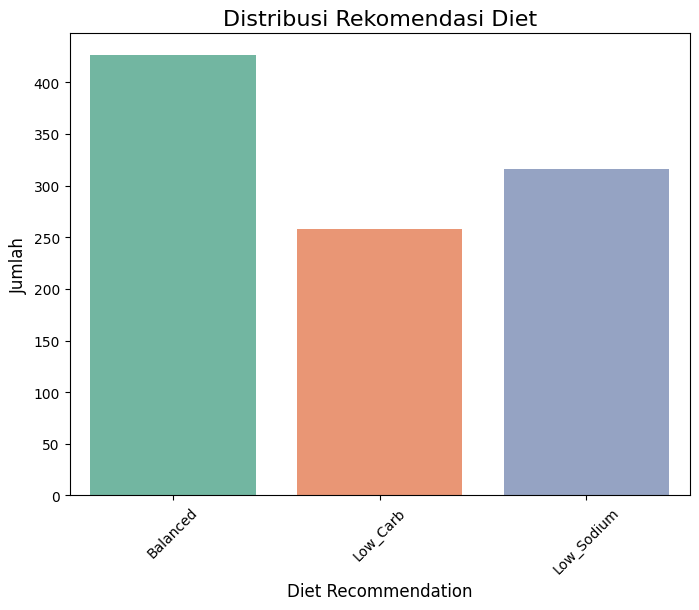

In [49]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi berdasarkan Diet_Recommendation
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diet_Recommendation', palette='Set2')

# Set title and labels
plt.title('Distribusi Rekomendasi Diet', fontsize=16)
plt.xlabel('Diet Recommendation', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan plot
plt.xticks(rotation=45)
plt.show()


Mayoritas rekomendasi diet adalah Balanced, menunjukkan fokus pada pola makan seimbang. Low_Sodium cukup banyak direkomendasikan, sementara Low_Carb paling sedikit, kemungkinan hanya untuk kasus tertentu.

In [50]:
def with_per(total, ax):
    for container in ax.containers:
        # mengambil semua bar (rects) dalam plot
        rects = container.get_children()
        for rect in rects:
            height = rect.get_height()
            percentage = '{:.1f}%'.format(100 * height / total)

            # menentukan posisi untuk label persentase
            x = rect.get_x() + rect.get_width() / 2
            y = height

            # menambahkan anotasi di atas setiap bar
            ax.annotate(percentage, (x, y), ha='center', va='center',
                        xytext=(0, 8), textcoords='offset points', fontsize=12)

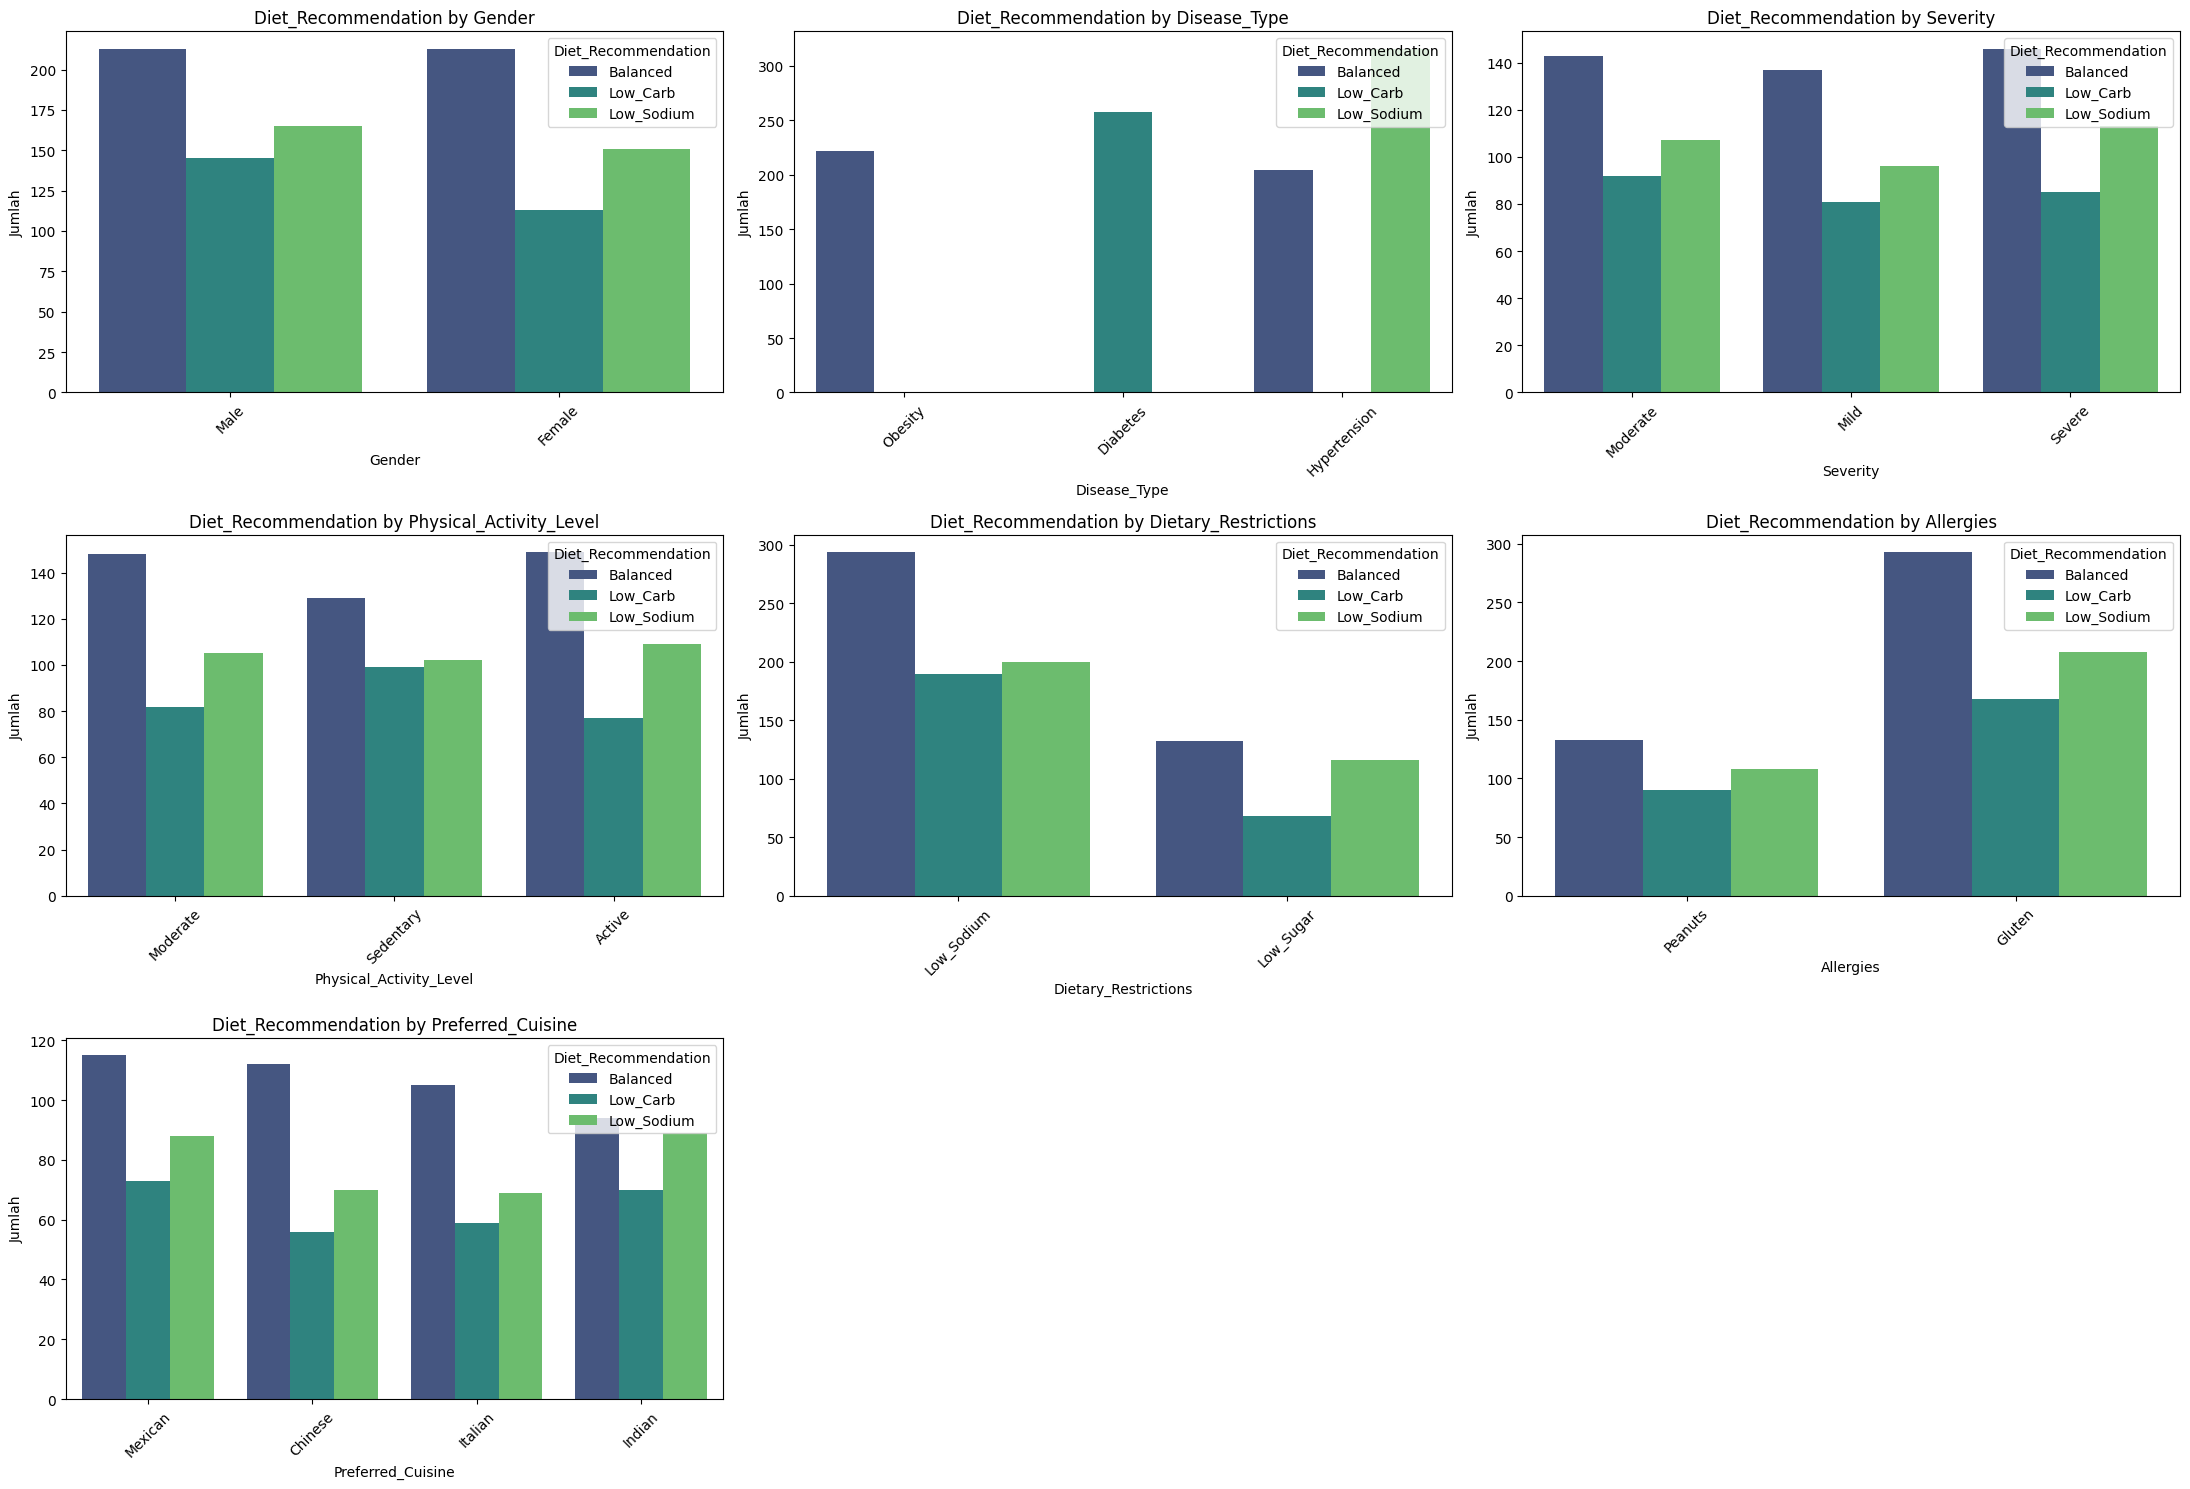

In [51]:
# Visualisasi pada data kategorikal

cat_features = [col for col in cat_features if col != 'Patient_ID']

# Atur target untuk hue
target_col = 'Diet_Recommendation'

# Siapkan subplot grid
num_features = len(cat_features)
num_rows = (num_features + 2) // 3  # Biar fleksibel tergantung jumlah fitur
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols, figsize=(22, 5 * num_rows))

# Flatten axs biar mudah diakses
axs = axs.flatten()

# Plot per fitur kategorikal
for i, feature in enumerate(cat_features):
    total = len(df_clean)
    ax = sns.countplot(x=feature, data=df_clean, hue=target_col, palette='viridis', ax=axs[i])

    ax.set_title(f'{target_col} by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Jumlah')
    ax.legend(title=target_col, loc='upper right')
    ax.tick_params(axis='x', rotation=45)

# Hapus subplot kosong jika jumlah fitur < subplot grid
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


Berikut insight singkat dari visualisasi tersebut:

*   Balanced paling banyak direkomendasikan di hampir semua kategori.
*   Low_Carb dominan untuk penderita diabetes dan mereka yang punya diet low sugar.
* Low_Sodium banyak direkomendasikan untuk penderita hipertensi dan yang punya diet rendah garam.
* Gender: Balanced dominan di semua gender, tetapi perempuan lebih banyak diberi diet ini.
* Aktivitas fisik dan tingkat keparahan penyakit tidak terlalu memengaruhi perbedaan pola diet yang drastis.
* Preferensi masakan menunjukkan distribusi yang cukup merata, tapi masakan Meksiko dan Cina cenderung dikaitkan dengan diet Balanced.

Kesimpulan: Rekomendasi diet disesuaikan dengan kondisi kesehatan seperti penyakit dan pembatasan diet, namun secara umum Balanced diet tetap paling umum.

In [52]:
# kelompokan fitur numerikal
num_features = [col for col in df_clean.select_dtypes(include='number').columns if col != 'Diet_Recommendation']
print(f'Numerical Features: {num_features}')

Numerical Features: ['Age', 'Weight_kg', 'Height_cm', 'BMI', 'Daily_Caloric_Intake', 'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL', 'Weekly_Exercise_Hours', 'Adherence_to_Diet_Plan', 'Dietary_Nutrient_Imbalance_Score']


In [53]:
df['Diet_Recommendation'].unique()

array(['Balanced', 'Low_Carb', 'Low_Sodium'], dtype=object)

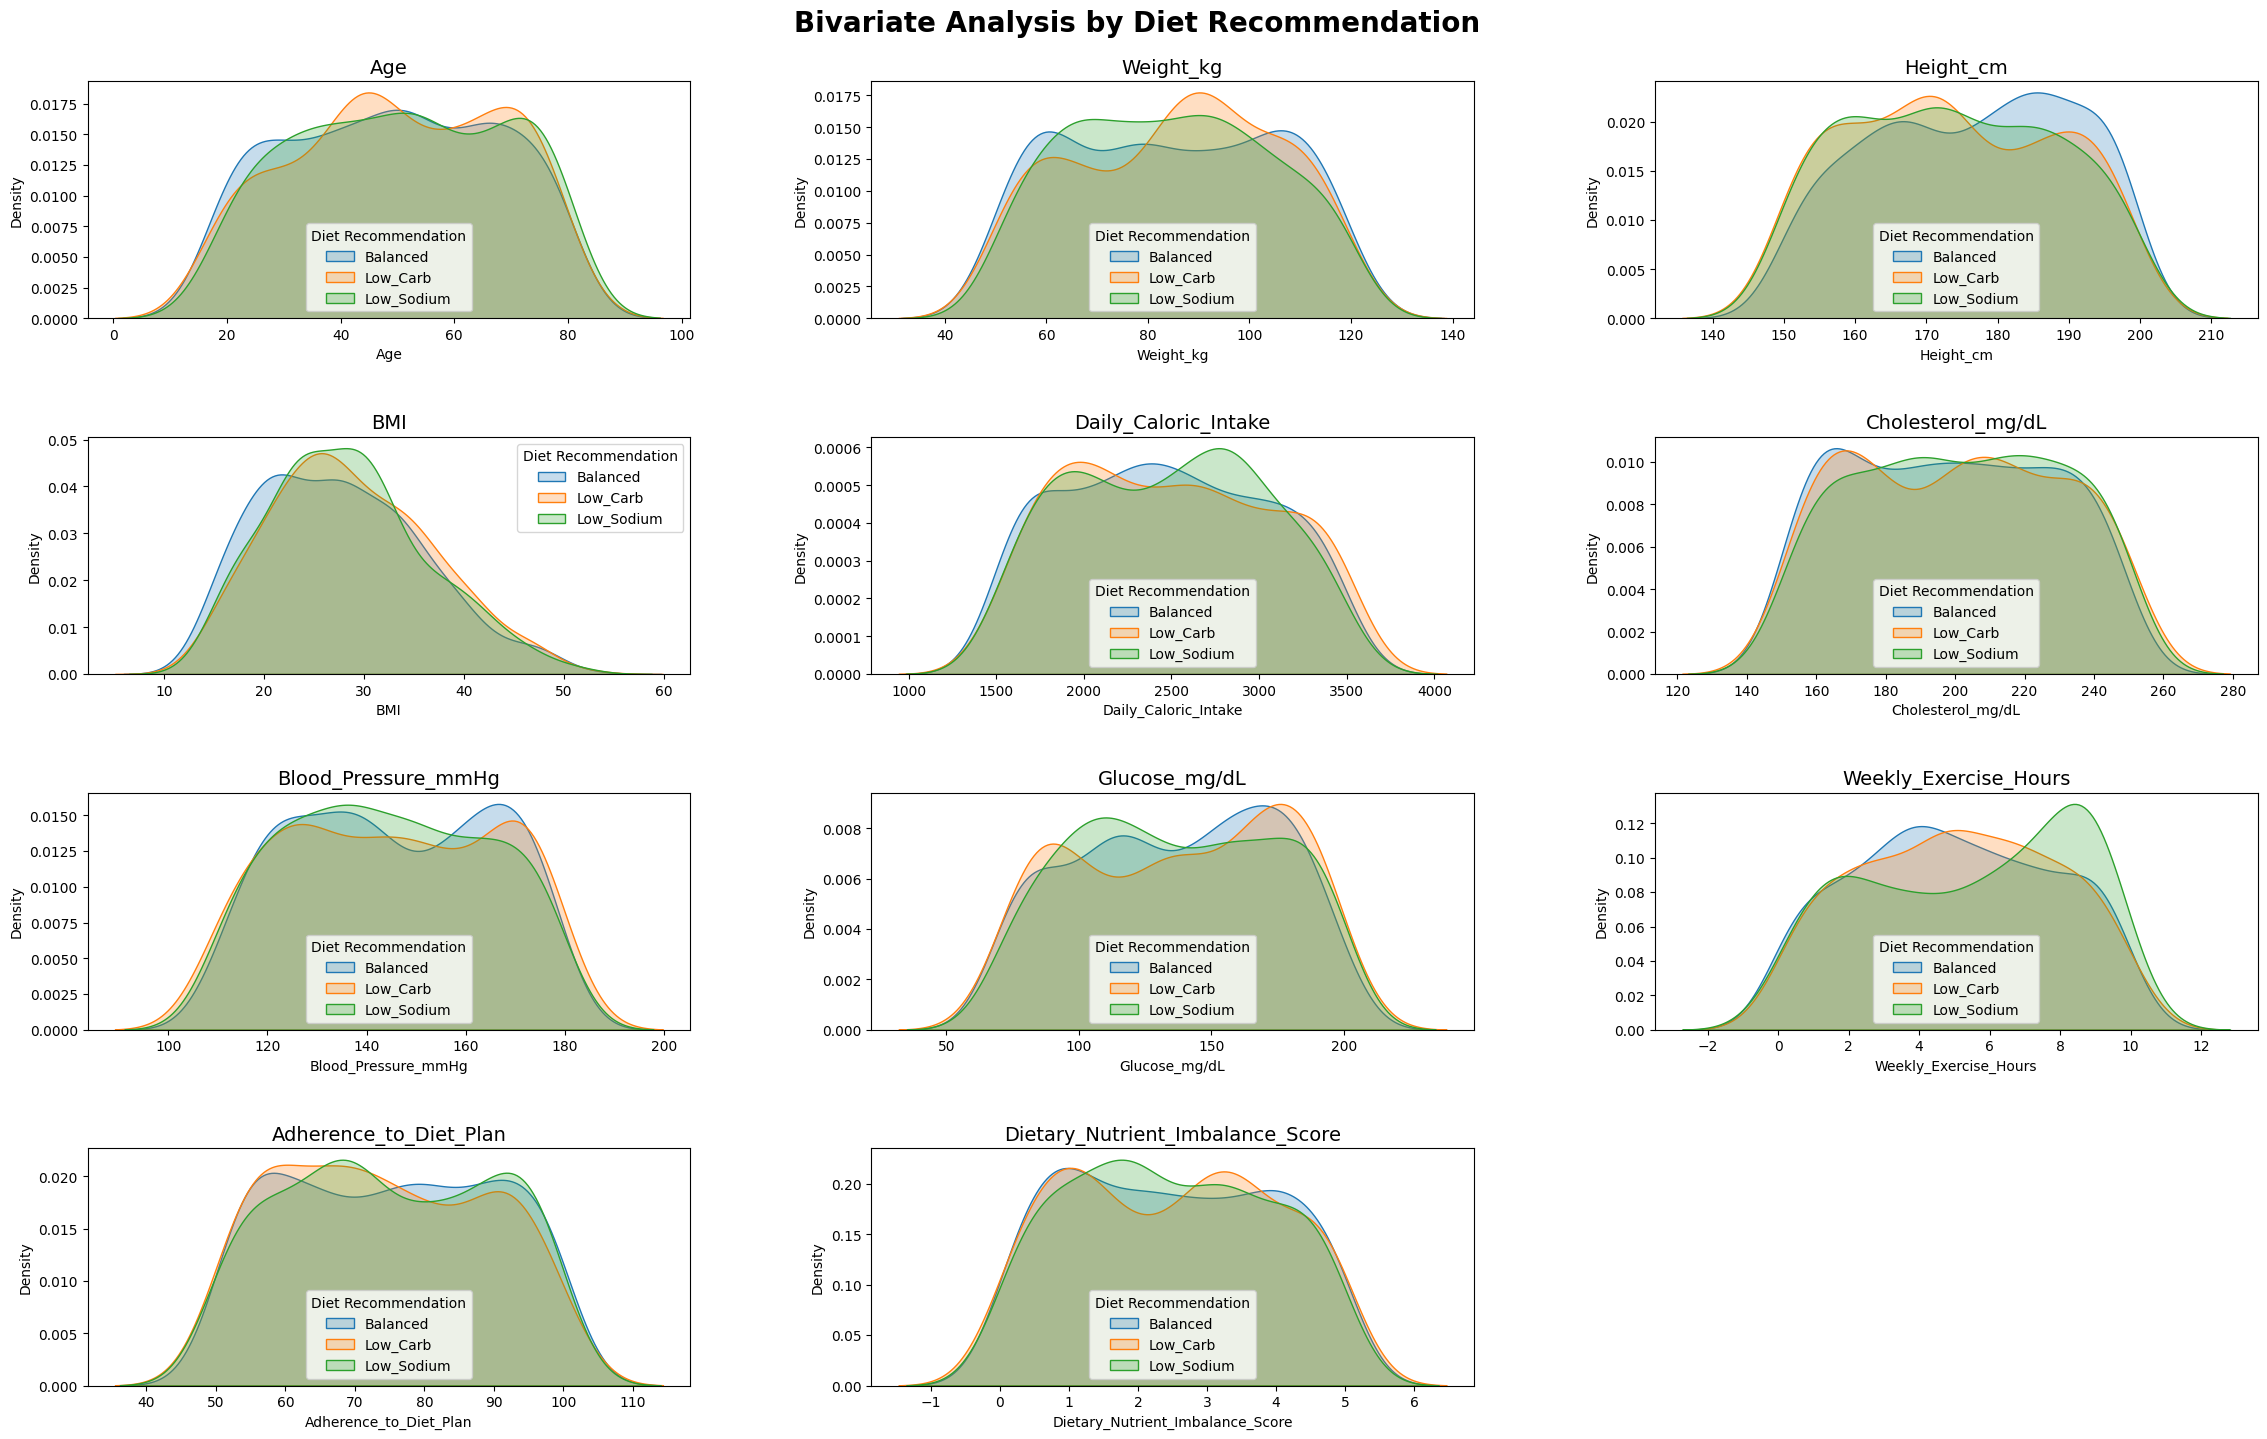

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan kamu sudah punya num_features
# num_features = [col for col in df_clean.select_dtypes(include='number').columns if col != 'Diet_Recommendation']

# Visualisasi numerikal vs Diet_Recommendation
fig = plt.figure(figsize=[28, 24])
fig.suptitle('Bivariate Analysis by Diet Recommendation', fontsize=20, fontweight='bold')
fig.subplots_adjust(top=0.95, hspace=0.5, wspace=0.3)

for i, col in enumerate(num_features):
    ax = fig.add_subplot(6, 3, i + 1)

    # Loop tiap nilai unik pada Diet_Recommendation untuk plotting
    for label in df_clean['Diet_Recommendation'].unique():
        sns.kdeplot(
            data=df_clean[df_clean['Diet_Recommendation'] == label][col],
            ax=ax,
            label=label,
            fill=True
        )

    ax.set_title(col, fontsize=14)
    ax.legend(title='Diet Recommendation', fontsize=10)

plt.show()

Berdasarkan visualisasi analisis bivariat, pola distribusi diet menunjukkan perbedaan yang cukup jelas untuk beberapa variabel. Diet Low_Carb lebih banyak direkomendasikan untuk individu dengan kadar glukosa dan BMI yang lebih tinggi, serta asupan kalori harian yang besar, yang mengindikasikan relevansinya untuk penderita diabetes atau obesitas. Diet Low_Sodium lebih umum pada individu dengan tekanan darah tinggi dan tingkat olahraga mingguan yang tinggi, mendukung penerapannya pada kasus hipertensi. Sementara itu, diet Balanced tersebar merata di hampir semua variabel seperti usia, tinggi, berat badan, dan skor ketidakseimbangan nutrisi, menunjukkan bahwa diet ini menjadi rekomendasi standar yang cocok untuk kondisi umum.

In [55]:
# cek data outlier
import numpy as np
import pandas as pd

def detect_outliers_iqr(df):
    df_numeric = df.select_dtypes(include=[np.number])
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return (df_numeric < lower_bound) | (df_numeric > upper_bound)

outliers = detect_outliers_iqr(df_clean)
outliers.sum()

,0
Age,0
Weight_kg,0
Height_cm,0
BMI,4
Daily_Caloric_Intake,0
Cholesterol_mg/dL,0
Blood_Pressure_mmHg,0
Glucose_mg/dL,0
Weekly_Exercise_Hours,0
Adherence_to_Diet_Plan,0


In [56]:
data = df_clean.copy()

In [57]:
from sklearn.preprocessing import OneHotEncoder

# salin data asli
data_fe = data.copy()

# inisialisasi encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# tit dan transform data
encoded_data = encoder.fit_transform(data_fe[cat_features])

# buat DataFrame dari hasil encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_features))

# gabungkan dengan data numerik
numerical_cols = [col for col in data_fe.columns if col not in cat_features]
final_data = pd.concat([data_fe[numerical_cols], encoded_df], axis=1)
final_data['Diet_Recommendation'] = data['Diet_Recommendation'].map({'Balanced': 0, 'Low_Carb': 1, 'Low_Sodium': 2})

# tampilkan hasil
final_data.tail()

,Age,Weight_kg,Height_cm,BMI,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,...,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary,Dietary_Restrictions_Low_Sodium,Dietary_Restrictions_Low_Sugar,Allergies_Gluten,Allergies_Peanuts,Preferred_Cuisine_Chinese,Preferred_Cuisine_Indian,Preferred_Cuisine_Italian,Preferred_Cuisine_Mexican
995,18,72.1,160,28.2,2639,152.6,166,125.1,4.4,55.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
996,35,104.0,171,35.6,1661,172.2,126,78.6,7.3,88.8,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,49,56.0,182,16.9,3102,228.0,148,70.2,8.9,68.6,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
998,64,66.6,185,19.5,3235,170.1,177,138.0,6.7,52.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
999,66,101.3,194,26.9,2042,158.0,164,114.7,2.0,68.2,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [58]:
print(final_data.columns)
print('total kolom:',len(final_data.columns))

Index(['Age', 'Weight_kg', 'Height_cm', 'BMI', 'Daily_Caloric_Intake',
       'Cholesterol_mg/dL', 'Blood_Pressure_mmHg', 'Glucose_mg/dL',
       'Weekly_Exercise_Hours', 'Adherence_to_Diet_Plan',
       'Dietary_Nutrient_Imbalance_Score', 'Diet_Recommendation',
       'Gender_Female', 'Gender_Male', 'Disease_Type_Diabetes',
       'Disease_Type_Hypertension', 'Disease_Type_Obesity', 'Severity_Mild',
       'Severity_Moderate', 'Severity_Severe',
       'Physical_Activity_Level_Active', 'Physical_Activity_Level_Moderate',
       'Physical_Activity_Level_Sedentary', 'Dietary_Restrictions_Low_Sodium',
       'Dietary_Restrictions_Low_Sugar', 'Allergies_Gluten',
       'Allergies_Peanuts', 'Preferred_Cuisine_Chinese',
       'Preferred_Cuisine_Indian', 'Preferred_Cuisine_Italian',
       'Preferred_Cuisine_Mexican'],
      dtype='object')
total kolom: 31


In [59]:
# memisahkan fitur dengan label
X = final_data.drop(columns='Diet_Recommendation')
y = final_data['Diet_Recommendation']

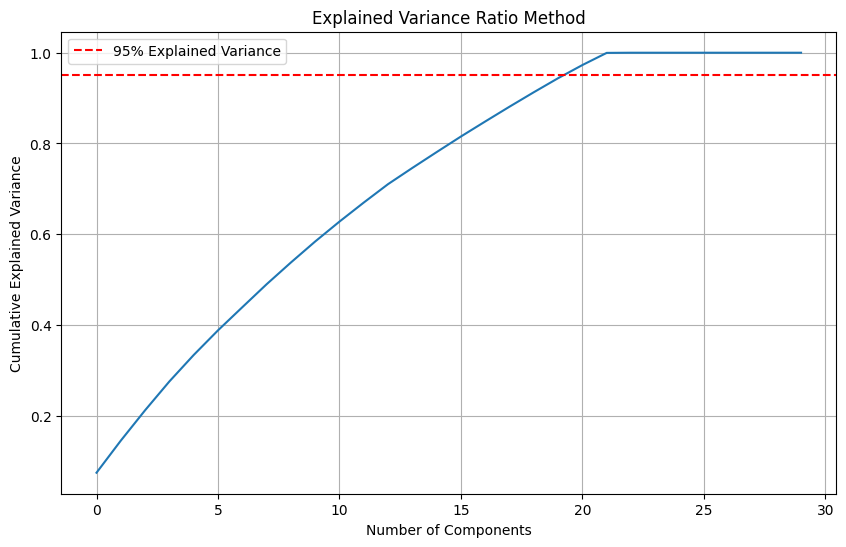

Jumlah komponen untuk 95% varians: 21


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Misalnya: X adalah dataset kamu setelah binning
# Pastikan semua kolom kategorikal diubah ke numerik
X_encoded = pd.get_dummies(X)  # ubah semua kolom string jadi angka pakai one-hot encoding

# Standardisasi data
X_scaled = StandardScaler().fit_transform(X_encoded)

# Lakukan PCA
pca = PCA().fit(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.title('Explained Variance Ratio Method')
plt.grid(True)
plt.show()

# Hitung jumlah komponen untuk 95% varians
n_components_95 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Jumlah komponen untuk 95% varians: {n_components_95}")


Berdasarkan grafik metode Explained Variance Ratio di atas, dapat disimpulkan bahwa sekitar 20 komponen utama pertama telah mampu menjelaskan sekitar 95% variansi dari keseluruhan data. Hal ini ditunjukkan oleh titik potong antara garis akumulasi variansi (biru) dengan garis horizontal merah yang menandai ambang batas 95% explained variance. Setelah komponen ke-20, tambahan variansi yang dijelaskan menjadi sangat kecil, yang mengindikasikan bahwa komponen-komponen selanjutnya tidak memberikan kontribusi informasi yang signifikan terhadap data. Oleh karena itu, pemilihan 20 komponen utama merupakan keputusan yang efisien dalam rangka reduksi dimensi tanpa kehilangan informasi penting. Dengan menggunakan jumlah komponen tersebut, kompleksitas data dapat dikurangi secara optimal, sekaligus menjaga kualitas informasi yang terkandung di dalamnya, yang sangat bermanfaat dalam proses analisis lanjutan maupun pelatihan model machine learning.

In [61]:
# implementasi PCA dengan n_component optimal
pca = PCA(n_components=21) # kalau mau otomatis pakai 'mle'
X_pca = pca.fit_transform(X_scaled)

In [62]:
len(X_pca[1])

21

# Pemodelan

In [63]:
# pembagian data dengan Hold-Out Validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [64]:
# import matrik evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [65]:
# membuat fungsi untuk menampilkan confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor="black")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi model Logistic Regression
model_lr = LogisticRegression(random_state=42)

# Hyperparameter grid untuk Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],             # masukkan regularisasi
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # masukkan nilai C (lebih kecil -> lebih kuat)
    'solver': ['liblinear', 'saga']       # masukkan solver yang digunakan
}

# Inisialisasi GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=model_lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    error_score='raise'
)

# Training model dengan Grid Search
grid_search_lr.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params_lr = grid_search_lr.best_params_

# Mendapatkan model terbaik
best_model_lr = grid_search_lr.best_estimator_

print("Best Params:", best_params_lr)

Best Params: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [67]:
best_model_lr.fit(X_train, y_train)

y_pred_lr = best_model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)*100:.2f}%")

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       137
           1       1.00      1.00      1.00        67
           2       0.57      1.00      0.73        96

    accuracy                           0.76       300
   macro avg       0.86      0.82      0.79       300
weighted avg       0.86      0.76      0.75       300

Accuracy: 76.00%


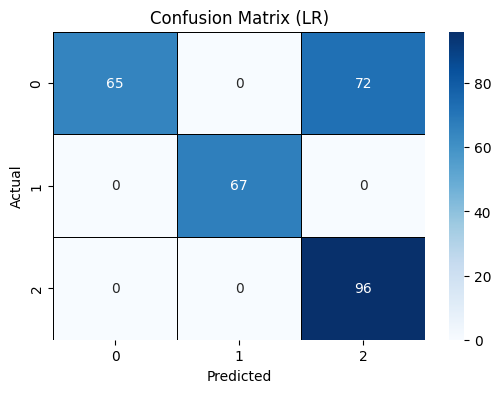

In [68]:
# menampilkan confusion matrix untuk model LR
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix (LR)")

Berdasarkan confusion matrix dari model Logistic Regression, terlihat bahwa model memiliki performa yang sangat bervariasi tergantung pada kelas target. Untuk kelas 2, model mampu mengklasifikasikan seluruh 96 sampel dengan benar tanpa kesalahan (akurasi 100% pada kelas tersebut). Demikian juga dengan kelas 1, seluruh 67 sampel diklasifikasikan dengan benar, menunjukkan bahwa model sangat efektif dalam mengenali pola pada kelas ini. Namun, terdapat masalah signifikan pada kelas 0, di mana hanya 65 sampel yang diklasifikasikan dengan benar dan sebanyak 72 sampel justru salah diklasifikasikan sebagai kelas 2. Hal ini mengindikasikan bahwa model kesulitan membedakan antara kelas 0 dan kelas 2, sehingga menghasilkan tingkat kesalahan yang tinggi untuk kelas 0. Ketidakseimbangan performa antar kelas ini perlu diperhatikan lebih lanjut, baik melalui analisis fitur, penyesuaian threshold, atau penggunaan metode penyeimbangan kelas agar hasil klasifikasi lebih konsisten di semua kelas.

In [69]:
# Implementasi KNN dengan GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Definisikan hyperparameter untuk KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # jumlah tetangga
    'weights': ['uniform', 'distance'],  # bobot voting
    'metric': ['euclidean', 'manhattan', 'minkowski']  # jenis jarak
}

# Inisialisasi model KNN
model_knn = KNeighborsClassifier()

# Inisialisasi GridSearchCV untuk KNN
grid_search_knn = GridSearchCV(
    estimator=model_knn,
    param_grid=param_grid_knn,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy'
)

# Melatih model dengan GridSearchCV untuk KNN
grid_search_knn.fit(X_train, y_train)

# Mendapatkan parameter terbaik untuk KNN
best_params_knn = grid_search_knn.best_params_

# Mendapatkan model terbaik KNN
best_model_knn = grid_search_knn.best_estimator_

print("Best Parameters for KNN:", best_params_knn)

Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [70]:
# implementasi KNN dengan parameter terbaik
best_model_knn.fit(X_train, y_train)

y_pred_knn = best_model_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)*100:.2f}%")

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       137
           1       1.00      0.99      0.99        67
           2       0.54      0.67      0.60        96

    accuracy                           0.71       300
   macro avg       0.76      0.75      0.75       300
weighted avg       0.73      0.71      0.72       300

Accuracy: 71.33%


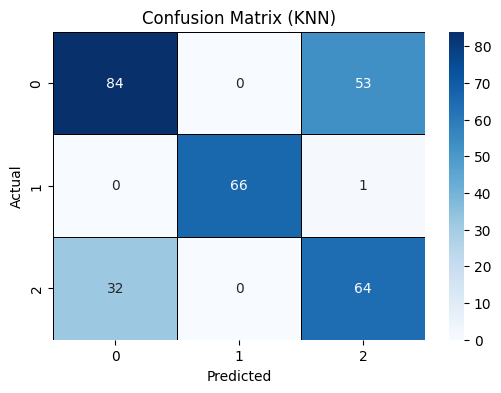

In [71]:
# menampilkan confusion matrix untuk model KNN
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix (KNN)")

Confusion matrix dari model K-Nearest Neighbors (KNN) menunjukkan bahwa model memiliki performa yang relatif baik, namun masih terdapat beberapa kesalahan klasifikasi yang signifikan, terutama pada kelas 0 dan kelas 2. Untuk kelas 0, sebanyak 84 data diklasifikasikan dengan benar, namun 53 data lainnya justru salah diklasifikasikan sebagai kelas 2. Demikian pula pada kelas 2, sebanyak 32 data salah diklasifikasikan sebagai kelas 0, meskipun 64 data berhasil diprediksi dengan benar. Di sisi lain, model mampu mengenali kelas 1 dengan sangat baik, dengan hanya satu data yang salah klasifikasi dari total 67 data aktual. Hal ini menunjukkan bahwa meskipun model cukup akurat dalam mengidentifikasi kelas 1, namun perlu dilakukan perbaikan dalam membedakan antara kelas 0 dan 2. Performa KNN yang bergantung pada jarak antar data kemungkinan mengalami kesulitan dalam menangani kemiripan fitur antara kelas 0 dan 2, sehingga diperlukan eksplorasi lebih lanjut seperti normalisasi data, tuning parameter jumlah tetangga (k), atau pemilihan fitur yang lebih representatif untuk meningkatkan akurasi klasifikasi.

In [72]:
from sklearn.svm import SVC

# definisikan hyperparameter algoritma SVM
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100], # masukkan parameter C
    'kernel': ['linear', 'rbf'], # masukkan parameter kernel
    'gamma': [0.001, 0.01, 0.1, 1]  # masukkan parameter gamma
}

# inisialisasi model svm
model_svm = SVC(probability=True, random_state=42)

# inisialisasi GridSearchCV untuk SVM
grid_search_svm = GridSearchCV(
    estimator = model_svm,
    param_grid = param_grid_svm,
    cv=5,  # 5-fold cross validation
    scoring='accuracy'
)

# melatih model dengan Grid Search
grid_search_svm.fit(X_train, y_train)

# mendapatkan parameter terbaik
best_params_svm = grid_search_svm.best_params_

# mendapatkan model terbaik
best_model_svm = grid_search_svm.best_estimator_

print(best_params_svm)

{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}


In [73]:
# implementasi SVM dengan parameter terbaik
best_model_svm.fit(X_train, y_train)

y_pred_svm = best_model_svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)*100:.2f}%")

              precision    recall  f1-score   support

           0       1.00      0.47      0.64       137
           1       1.00      1.00      1.00        67
           2       0.57      1.00      0.73        96

    accuracy                           0.76       300
   macro avg       0.86      0.82      0.79       300
weighted avg       0.86      0.76      0.75       300

Accuracy: 76.00%


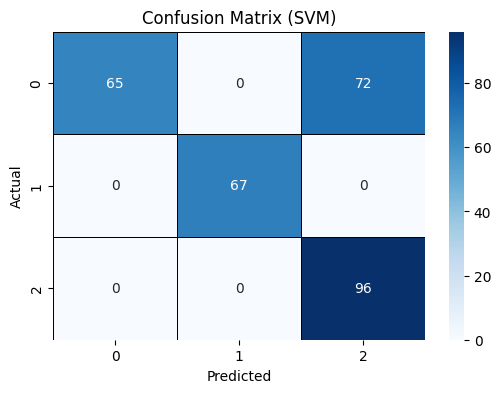

In [74]:
# menampilkan confusion matrix untuk model SVM
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix (SVM)")

Confusion matrix untuk model Support Vector Machine (SVM) menunjukkan pola performa yang sangat mirip dengan model Logistic Regression. Model ini menunjukkan akurasi sempurna dalam mengklasifikasikan kelas 1 dan kelas 2, dengan masing-masing 67 dan 96 data yang diprediksi dengan benar tanpa kesalahan. Namun, kelemahan yang sangat jelas terlihat pada kelas 0, di mana sebanyak 65 data diklasifikasikan dengan benar, sementara 72 data justru salah diklasifikasikan sebagai kelas 2. Kesalahan prediksi ini menunjukkan bahwa model SVM kesulitan membedakan fitur antara kelas 0 dan kelas 2, yang mungkin disebabkan oleh overlap data atau kurang optimalnya pemisahan margin antar kelas. Meskipun SVM secara teori sangat efektif dalam menangani data yang tidak linier, hasil ini menunjukkan perlunya penyesuaian kernel, tuning parameter seperti C dan gamma, atau mungkin perlu dilakukan teknik pra-pemrosesan tambahan untuk meningkatkan pemisahan antar kelas yang sulit dibedakan tersebut.

In [75]:
from sklearn.ensemble import VotingClassifier

# Gabungkan dengan Voting Classifier
ensemble = VotingClassifier(
    estimators=[('knn', best_model_knn), ('lr', best_model_lr), ('svm', best_model_svm)],
    voting='soft'  # tentukan mau 'hard' atau 'soft' voting
)

ensemble.fit(X_train, y_train)
y_pred_el = ensemble.predict(X_test)
print(classification_report(y_test, y_pred_el))
print(f"Accuracy: {accuracy_score(y_test, y_pred_el)*100:.2f}%")

              precision    recall  f1-score   support

           0       0.98      0.47      0.64       137
           1       1.00      1.00      1.00        67
           2       0.57      0.99      0.72        96

    accuracy                           0.76       300
   macro avg       0.85      0.82      0.79       300
weighted avg       0.86      0.76      0.75       300

Accuracy: 75.67%


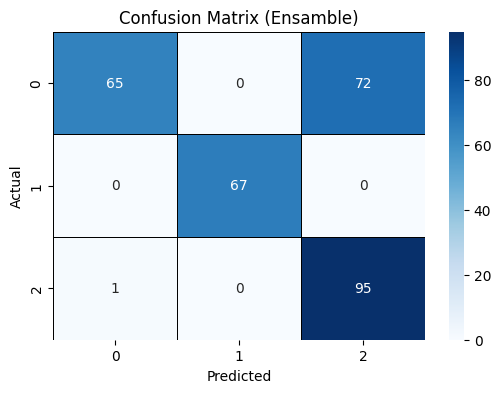

In [76]:
# menampilkan confusion matrix untuk model Ensamble
plot_confusion_matrix(y_test, y_pred_el, "Confusion Matrix (Ensamble)")

Berdasarkan confusion matrix yang ditampilkan, model ensamble menunjukkan performa klasifikasi yang beragam antar kelas. Kelas 1 berhasil diklasifikasikan dengan sangat baik tanpa adanya kesalahan, yang menunjukkan bahwa model mampu membedakan kelas ini secara jelas dari kelas lainnya. Namun, terdapat kelemahan yang signifikan pada klasifikasi antara kelas 0 dan kelas 2, di mana sebanyak 72 sampel dari kelas 0 justru diklasifikasikan sebagai kelas 2. Hal ini menunjukkan adanya kemiripan atau tumpang tindih fitur antara kedua kelas tersebut yang menyebabkan model kesulitan dalam membedakannya. Meskipun demikian, kelas 2 masih diklasifikasikan dengan cukup baik dengan hanya satu kesalahan klasifikasi ke kelas 0. Berdasarkan temuan ini, disarankan untuk melakukan analisis lebih lanjut terhadap fitur yang digunakan, terutama untuk membedakan kelas 0 dan kelas 2, serta mempertimbangkan metode peningkatan seperti feature engineering atau visualisasi distribusi data agar model dapat belajar dengan lebih efektif dalam membedakan kelas yang sulit dikenali.